In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

from matplotlib import animation

%matplotlib inline

Using TensorFlow backend.


In [12]:
loss_functions = ['mse','mae', 'mape','msle','cosine']

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [4]:
np.random.seed(12)

In [5]:
def function(x):
    return abs(math.sin(x))**(1/2)

In [7]:
X = np.linspace(-4,4,400)
y = np.array(list(map(function,X)))

x_train = np.array([X[i] for i in range(0,len(X),2)])
y_train = np.array([y[i] for i in range(0,len(y),2)])

x_test = np.array([X[i] for i in range(0,len(X),5)])
y_test = np.array([y[i] for i in range(0,len(y),5)])

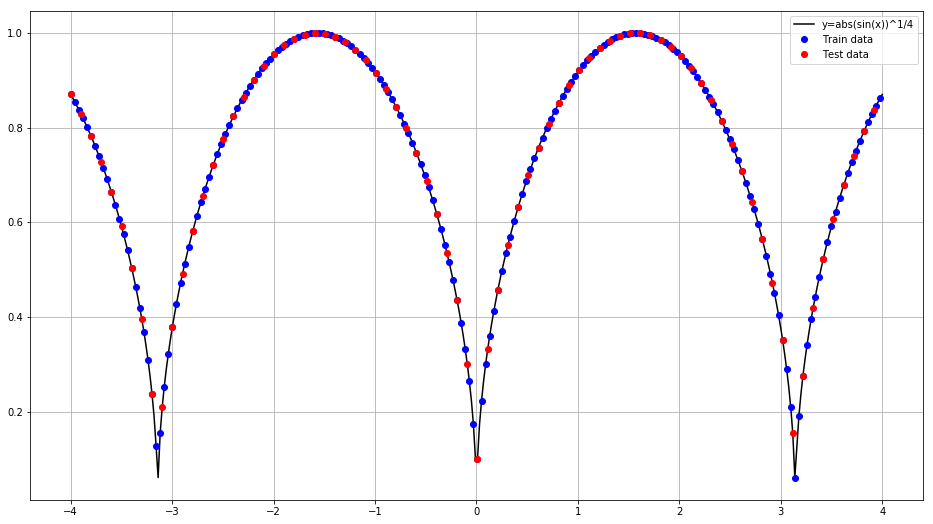

In [8]:
plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
plt.plot(x_train,y_train,'o',color='#0000FF',label='Train data')
plt.plot(x_test,y_test,'o',color='#FF0000',label='Test data', linewidth=6)
plt.grid()
plt.legend()
plt.show()

In [9]:
neurons_type = 'selu'
epochs_number = 50

In [10]:
losses = []

In [11]:
for LF in loss_functions:
    
    model = Sequential()
    
    model.add(Dense(65, input_dim=1, activation=neurons_type, kernel_initializer='he_normal'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss=LF, optimizer='adam')
    
    loss = {'loss':[], 'val_loss':[]}
        
    for epoch in range(epochs_number): 
        
        print('Loss function: {0}. Epoch: {1}'.format(LF, epoch*10))
        
        hist = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=2, validation_data=(x_test,y_test))
        
        loss['loss'].extend(hist.history['loss'])
        loss['val_loss'].extend(hist.history['val_loss'])
        
    losses.append(loss)
    model.save('model {0}.h5'.format(LF))    

Loss function: mse. Epoch: 0
Train on 200 samples, validate on 80 samples
Epoch 1/10
2s - loss: 3.4408 - val_loss: 1.6499
Epoch 2/10
0s - loss: 1.2191 - val_loss: 0.7107
Epoch 3/10
0s - loss: 0.4614 - val_loss: 0.3036
Epoch 4/10
0s - loss: 0.2472 - val_loss: 0.2050
Epoch 5/10
0s - loss: 0.1949 - val_loss: 0.1834
Epoch 6/10
0s - loss: 0.1791 - val_loss: 0.1707
Epoch 7/10
0s - loss: 0.1672 - val_loss: 0.1615
Epoch 8/10
0s - loss: 0.1582 - val_loss: 0.1531
Epoch 9/10
0s - loss: 0.1500 - val_loss: 0.1458
Epoch 10/10
0s - loss: 0.1453 - val_loss: 0.1402
Loss function: mse. Epoch: 10
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1399 - val_loss: 0.1358
Epoch 2/10
0s - loss: 0.1345 - val_loss: 0.1323
Epoch 3/10
0s - loss: 0.1315 - val_loss: 0.1296
Epoch 4/10
0s - loss: 0.1290 - val_loss: 0.1267
Epoch 5/10
0s - loss: 0.1280 - val_loss: 0.1245
Epoch 6/10
0s - loss: 0.1249 - val_loss: 0.1230
Epoch 7/10
0s - loss: 0.1226 - val_loss: 0.1208
Epoch 8/10
0s - loss: 0.1219 - val

0s - loss: 0.0299 - val_loss: 0.0272
Epoch 9/10
0s - loss: 0.0278 - val_loss: 0.0277
Epoch 10/10
0s - loss: 0.0280 - val_loss: 0.0269
Loss function: mse. Epoch: 150
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0284 - val_loss: 0.0265
Epoch 2/10
0s - loss: 0.0279 - val_loss: 0.0304
Epoch 3/10
0s - loss: 0.0333 - val_loss: 0.0398
Epoch 4/10
0s - loss: 0.0332 - val_loss: 0.0276
Epoch 5/10
0s - loss: 0.0306 - val_loss: 0.0313
Epoch 6/10
0s - loss: 0.0287 - val_loss: 0.0277
Epoch 7/10
0s - loss: 0.0298 - val_loss: 0.0275
Epoch 8/10
0s - loss: 0.0295 - val_loss: 0.0262
Epoch 9/10
0s - loss: 0.0288 - val_loss: 0.0261
Epoch 10/10
0s - loss: 0.0275 - val_loss: 0.0262
Loss function: mse. Epoch: 160
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0283 - val_loss: 0.0285
Epoch 2/10
0s - loss: 0.0296 - val_loss: 0.0292
Epoch 3/10
0s - loss: 0.0288 - val_loss: 0.0330
Epoch 4/10
0s - loss: 0.0285 - val_loss: 0.0315
Epoch 5/10
0s - loss: 0.0299 - val_loss: 

0s - loss: 0.0274 - val_loss: 0.0258
Epoch 6/10
0s - loss: 0.0326 - val_loss: 0.0235
Epoch 7/10
0s - loss: 0.0293 - val_loss: 0.0238
Epoch 8/10
0s - loss: 0.0250 - val_loss: 0.0342
Epoch 9/10
0s - loss: 0.0330 - val_loss: 0.0240
Epoch 10/10
0s - loss: 0.0299 - val_loss: 0.0250
Loss function: mse. Epoch: 300
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0267 - val_loss: 0.0232
Epoch 2/10
0s - loss: 0.0266 - val_loss: 0.0252
Epoch 3/10
0s - loss: 0.0251 - val_loss: 0.0261
Epoch 4/10
0s - loss: 0.0302 - val_loss: 0.0341
Epoch 5/10
0s - loss: 0.0293 - val_loss: 0.0230
Epoch 6/10
0s - loss: 0.0275 - val_loss: 0.0238
Epoch 7/10
0s - loss: 0.0267 - val_loss: 0.0369
Epoch 8/10
0s - loss: 0.0294 - val_loss: 0.0406
Epoch 9/10
0s - loss: 0.0300 - val_loss: 0.0230
Epoch 10/10
0s - loss: 0.0269 - val_loss: 0.0268
Loss function: mse. Epoch: 310
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0306 - val_loss: 0.0260
Epoch 2/10
0s - loss: 0.0293 - val_loss: 

0s - loss: 0.0279 - val_loss: 0.0217
Epoch 3/10
0s - loss: 0.0231 - val_loss: 0.0222
Epoch 4/10
0s - loss: 0.0226 - val_loss: 0.0321
Epoch 5/10
0s - loss: 0.0261 - val_loss: 0.0259
Epoch 6/10
0s - loss: 0.0251 - val_loss: 0.0252
Epoch 7/10
0s - loss: 0.0238 - val_loss: 0.0217
Epoch 8/10
0s - loss: 0.0236 - val_loss: 0.0378
Epoch 9/10
0s - loss: 0.0297 - val_loss: 0.0212
Epoch 10/10
0s - loss: 0.0228 - val_loss: 0.0218
Loss function: mse. Epoch: 450
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0239 - val_loss: 0.0284
Epoch 2/10
0s - loss: 0.0252 - val_loss: 0.0227
Epoch 3/10
0s - loss: 0.0243 - val_loss: 0.0211
Epoch 4/10
0s - loss: 0.0245 - val_loss: 0.0223
Epoch 5/10
0s - loss: 0.0290 - val_loss: 0.0232
Epoch 6/10
0s - loss: 0.0289 - val_loss: 0.0222
Epoch 7/10
0s - loss: 0.0271 - val_loss: 0.0358
Epoch 8/10
0s - loss: 0.0298 - val_loss: 0.0297
Epoch 9/10
0s - loss: 0.0265 - val_loss: 0.0326
Epoch 10/10
0s - loss: 0.0268 - val_loss: 0.0238
Loss function: mse. E

0s - loss: 0.1165 - val_loss: 0.1230
Epoch 2/10
0s - loss: 0.1209 - val_loss: 0.1221
Epoch 3/10
0s - loss: 0.1264 - val_loss: 0.1120
Epoch 4/10
0s - loss: 0.1141 - val_loss: 0.1182
Epoch 5/10
0s - loss: 0.1172 - val_loss: 0.1146
Epoch 6/10
0s - loss: 0.1182 - val_loss: 0.1120
Epoch 7/10
0s - loss: 0.1170 - val_loss: 0.1172
Epoch 8/10
0s - loss: 0.1166 - val_loss: 0.1169
Epoch 9/10
0s - loss: 0.1152 - val_loss: 0.1169
Epoch 10/10
0s - loss: 0.1192 - val_loss: 0.1214
Loss function: mae. Epoch: 100
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1161 - val_loss: 0.1113
Epoch 2/10
0s - loss: 0.1243 - val_loss: 0.1113
Epoch 3/10
0s - loss: 0.1402 - val_loss: 0.1304
Epoch 4/10
0s - loss: 0.1268 - val_loss: 0.1110
Epoch 5/10
0s - loss: 0.1161 - val_loss: 0.1131
Epoch 6/10
0s - loss: 0.1168 - val_loss: 0.1142
Epoch 7/10
0s - loss: 0.1246 - val_loss: 0.1164
Epoch 8/10
0s - loss: 0.1158 - val_loss: 0.1095
Epoch 9/10
0s - loss: 0.1139 - val_loss: 0.1086
Epoch 10/10
0s - loss:

0s - loss: 0.1051 - val_loss: 0.1008
Loss function: mae. Epoch: 240
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1080 - val_loss: 0.1065
Epoch 2/10
0s - loss: 0.1118 - val_loss: 0.1087
Epoch 3/10
0s - loss: 0.1123 - val_loss: 0.1007
Epoch 4/10
0s - loss: 0.1068 - val_loss: 0.1088
Epoch 5/10
0s - loss: 0.1155 - val_loss: 0.1170
Epoch 6/10
0s - loss: 0.1065 - val_loss: 0.0998
Epoch 7/10
0s - loss: 0.1069 - val_loss: 0.1039
Epoch 8/10
0s - loss: 0.1060 - val_loss: 0.1080
Epoch 9/10
0s - loss: 0.1165 - val_loss: 0.1070
Epoch 10/10
0s - loss: 0.1100 - val_loss: 0.1051
Loss function: mae. Epoch: 250
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1120 - val_loss: 0.1043
Epoch 2/10
0s - loss: 0.1030 - val_loss: 0.1000
Epoch 3/10
0s - loss: 0.1036 - val_loss: 0.0991
Epoch 4/10
0s - loss: 0.1054 - val_loss: 0.1053
Epoch 5/10
0s - loss: 0.1203 - val_loss: 0.1055
Epoch 6/10
0s - loss: 0.1131 - val_loss: 0.1062
Epoch 7/10
0s - loss: 0.1038 - val_loss: 0

0s - loss: 0.1027 - val_loss: 0.0960
Epoch 8/10
0s - loss: 0.0988 - val_loss: 0.1036
Epoch 9/10
0s - loss: 0.0987 - val_loss: 0.0958
Epoch 10/10
0s - loss: 0.1004 - val_loss: 0.0955
Loss function: mae. Epoch: 390
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1059 - val_loss: 0.1035
Epoch 2/10
0s - loss: 0.1006 - val_loss: 0.0956
Epoch 3/10
0s - loss: 0.1044 - val_loss: 0.0948
Epoch 4/10
0s - loss: 0.1005 - val_loss: 0.1025
Epoch 5/10
0s - loss: 0.1028 - val_loss: 0.1040
Epoch 6/10
0s - loss: 0.1006 - val_loss: 0.0961
Epoch 7/10
0s - loss: 0.0996 - val_loss: 0.1188
Epoch 8/10
0s - loss: 0.1102 - val_loss: 0.1363
Epoch 9/10
0s - loss: 0.1172 - val_loss: 0.1093
Epoch 10/10
0s - loss: 0.1015 - val_loss: 0.1038
Loss function: mae. Epoch: 400
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1071 - val_loss: 0.1080
Epoch 2/10
0s - loss: 0.0974 - val_loss: 0.0948
Epoch 3/10
0s - loss: 0.1040 - val_loss: 0.1057
Epoch 4/10
0s - loss: 0.1044 - val_loss: 

0s - loss: 34.9868 - val_loss: 32.2401
Epoch 4/10
0s - loss: 33.6865 - val_loss: 30.3975
Epoch 5/10
0s - loss: 36.9462 - val_loss: 29.6388
Epoch 6/10
0s - loss: 32.0483 - val_loss: 29.6508
Epoch 7/10
0s - loss: 34.5745 - val_loss: 29.0175
Epoch 8/10
0s - loss: 32.3799 - val_loss: 31.7316
Epoch 9/10
0s - loss: 33.0347 - val_loss: 29.6575
Epoch 10/10
0s - loss: 33.7571 - val_loss: 42.2746
Loss function: mape. Epoch: 40
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 35.6693 - val_loss: 28.3537
Epoch 2/10
0s - loss: 32.7554 - val_loss: 28.5872
Epoch 3/10
0s - loss: 31.2181 - val_loss: 28.4508
Epoch 4/10
0s - loss: 30.6718 - val_loss: 29.9527
Epoch 5/10
0s - loss: 33.2890 - val_loss: 26.9139
Epoch 6/10
0s - loss: 29.7698 - val_loss: 26.6139
Epoch 7/10
0s - loss: 31.4416 - val_loss: 30.5618
Epoch 8/10
0s - loss: 31.9231 - val_loss: 29.3631
Epoch 9/10
0s - loss: 29.2824 - val_loss: 26.1476
Epoch 10/10
0s - loss: 29.1507 - val_loss: 26.1090
Loss function: mape. Epoch: 50
Tr

0s - loss: 27.9100 - val_loss: 28.0937
Epoch 7/10
0s - loss: 26.8319 - val_loss: 23.3352
Epoch 8/10
0s - loss: 24.5977 - val_loss: 21.9954
Epoch 9/10
0s - loss: 26.1331 - val_loss: 21.1318
Epoch 10/10
0s - loss: 25.7550 - val_loss: 20.8085
Loss function: mape. Epoch: 180
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 24.5004 - val_loss: 21.1844
Epoch 2/10
0s - loss: 24.9913 - val_loss: 22.2482
Epoch 3/10
0s - loss: 28.1870 - val_loss: 22.3460
Epoch 4/10
0s - loss: 25.1773 - val_loss: 21.2025
Epoch 5/10
0s - loss: 25.3897 - val_loss: 21.1859
Epoch 6/10
0s - loss: 25.9953 - val_loss: 24.8352
Epoch 7/10
0s - loss: 27.3233 - val_loss: 23.2157
Epoch 8/10
0s - loss: 25.7107 - val_loss: 23.8079
Epoch 9/10
0s - loss: 27.8400 - val_loss: 21.4210
Epoch 10/10
0s - loss: 25.1607 - val_loss: 21.8246
Loss function: mape. Epoch: 190
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 26.9411 - val_loss: 20.9971
Epoch 2/10
0s - loss: 31.0658 - val_loss: 35.0704
Epoch

0s - loss: 28.9177 - val_loss: 31.5454
Epoch 10/10
0s - loss: 28.6679 - val_loss: 21.8905
Loss function: mape. Epoch: 320
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 26.2291 - val_loss: 30.5075
Epoch 2/10
0s - loss: 28.3011 - val_loss: 21.7323
Epoch 3/10
0s - loss: 26.4012 - val_loss: 21.3948
Epoch 4/10
0s - loss: 24.1414 - val_loss: 20.8566
Epoch 5/10
0s - loss: 25.3959 - val_loss: 26.0939
Epoch 6/10
0s - loss: 30.1469 - val_loss: 22.4306
Epoch 7/10
0s - loss: 27.0645 - val_loss: 23.0519
Epoch 8/10
0s - loss: 24.9802 - val_loss: 20.9775
Epoch 9/10
0s - loss: 26.0767 - val_loss: 25.2870
Epoch 10/10
0s - loss: 26.2956 - val_loss: 20.9650
Loss function: mape. Epoch: 330
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 25.0164 - val_loss: 23.1693
Epoch 2/10
0s - loss: 27.7875 - val_loss: 26.4932
Epoch 3/10
0s - loss: 26.6583 - val_loss: 33.4067
Epoch 4/10
0s - loss: 33.1325 - val_loss: 23.1583
Epoch 5/10
0s - loss: 30.5431 - val_loss: 21.3741
Epoch

0s - loss: 25.7957 - val_loss: 21.4158
Epoch 2/10
0s - loss: 27.1425 - val_loss: 21.4360
Epoch 3/10
0s - loss: 24.6743 - val_loss: 28.0318
Epoch 4/10
0s - loss: 31.1115 - val_loss: 27.6592
Epoch 5/10
0s - loss: 26.4250 - val_loss: 24.7117
Epoch 6/10
0s - loss: 28.0939 - val_loss: 20.6653
Epoch 7/10
0s - loss: 23.6923 - val_loss: 21.8197
Epoch 8/10
0s - loss: 25.9970 - val_loss: 26.2001
Epoch 9/10
0s - loss: 26.7753 - val_loss: 20.5082
Epoch 10/10
0s - loss: 25.6893 - val_loss: 20.5984
Loss function: mape. Epoch: 470
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 25.5402 - val_loss: 20.9628
Epoch 2/10
0s - loss: 23.8227 - val_loss: 20.7213
Epoch 3/10
0s - loss: 24.2490 - val_loss: 20.4986
Epoch 4/10
0s - loss: 24.7779 - val_loss: 20.3750
Epoch 5/10
0s - loss: 24.6831 - val_loss: 21.3016
Epoch 6/10
0s - loss: 24.7061 - val_loss: 22.1253
Epoch 7/10
0s - loss: 25.4416 - val_loss: 23.6963
Epoch 8/10
0s - loss: 26.1984 - val_loss: 21.8736
Epoch 9/10
0s - loss: 25.1520 - v

0s - loss: 0.0145 - val_loss: 0.0142
Epoch 9/10
0s - loss: 0.0167 - val_loss: 0.0138
Epoch 10/10
0s - loss: 0.0148 - val_loss: 0.0133
Loss function: msle. Epoch: 110
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0154 - val_loss: 0.0137
Epoch 2/10
0s - loss: 0.0177 - val_loss: 0.0154
Epoch 3/10
0s - loss: 0.0193 - val_loss: 0.0185
Epoch 4/10
0s - loss: 0.0179 - val_loss: 0.0145
Epoch 5/10
0s - loss: 0.0164 - val_loss: 0.0153
Epoch 6/10
0s - loss: 0.0156 - val_loss: 0.0143
Epoch 7/10
0s - loss: 0.0161 - val_loss: 0.0131
Epoch 8/10
0s - loss: 0.0206 - val_loss: 0.0314
Epoch 9/10
0s - loss: 0.0228 - val_loss: 0.0231
Epoch 10/10
0s - loss: 0.0181 - val_loss: 0.0148
Loss function: msle. Epoch: 120
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0160 - val_loss: 0.0130
Epoch 2/10
0s - loss: 0.0143 - val_loss: 0.0197
Epoch 3/10
0s - loss: 0.0145 - val_loss: 0.0129
Epoch 4/10
0s - loss: 0.0143 - val_loss: 0.0136
Epoch 5/10
0s - loss: 0.0142 - val_loss

0s - loss: 0.0120 - val_loss: 0.0125
Epoch 6/10
0s - loss: 0.0133 - val_loss: 0.0129
Epoch 7/10
0s - loss: 0.0136 - val_loss: 0.0113
Epoch 8/10
0s - loss: 0.0121 - val_loss: 0.0108
Epoch 9/10
0s - loss: 0.0123 - val_loss: 0.0125
Epoch 10/10
0s - loss: 0.0124 - val_loss: 0.0113
Loss function: msle. Epoch: 260
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0154 - val_loss: 0.0218
Epoch 2/10
0s - loss: 0.0146 - val_loss: 0.0147
Epoch 3/10
0s - loss: 0.0129 - val_loss: 0.0143
Epoch 4/10
0s - loss: 0.0132 - val_loss: 0.0128
Epoch 5/10
0s - loss: 0.0117 - val_loss: 0.0128
Epoch 6/10
0s - loss: 0.0123 - val_loss: 0.0110
Epoch 7/10
0s - loss: 0.0120 - val_loss: 0.0111
Epoch 8/10
0s - loss: 0.0116 - val_loss: 0.0108
Epoch 9/10
0s - loss: 0.0127 - val_loss: 0.0125
Epoch 10/10
0s - loss: 0.0158 - val_loss: 0.0123
Loss function: msle. Epoch: 270
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0148 - val_loss: 0.0143
Epoch 2/10
0s - loss: 0.0135 - val_loss

0s - loss: 0.0115 - val_loss: 0.0145
Epoch 3/10
0s - loss: 0.0123 - val_loss: 0.0102
Epoch 4/10
0s - loss: 0.0111 - val_loss: 0.0108
Epoch 5/10
0s - loss: 0.0111 - val_loss: 0.0100
Epoch 6/10
0s - loss: 0.0127 - val_loss: 0.0102
Epoch 7/10
0s - loss: 0.0142 - val_loss: 0.0106
Epoch 8/10
0s - loss: 0.0117 - val_loss: 0.0121
Epoch 9/10
0s - loss: 0.0112 - val_loss: 0.0124
Epoch 10/10
0s - loss: 0.0112 - val_loss: 0.0099
Loss function: msle. Epoch: 410
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0107 - val_loss: 0.0097
Epoch 2/10
0s - loss: 0.0120 - val_loss: 0.0098
Epoch 3/10
0s - loss: 0.0121 - val_loss: 0.0104
Epoch 4/10
0s - loss: 0.0124 - val_loss: 0.0100
Epoch 5/10
0s - loss: 0.0117 - val_loss: 0.0112
Epoch 6/10
0s - loss: 0.0117 - val_loss: 0.0104
Epoch 7/10
0s - loss: 0.0106 - val_loss: 0.0134
Epoch 8/10
0s - loss: 0.0140 - val_loss: 0.0143
Epoch 9/10
0s - loss: 0.0119 - val_loss: 0.0109
Epoch 10/10
0s - loss: 0.0129 - val_loss: 0.0123
Loss function: msle.

ValueError: Unknown loss function:cosine 

Loss function: mse.


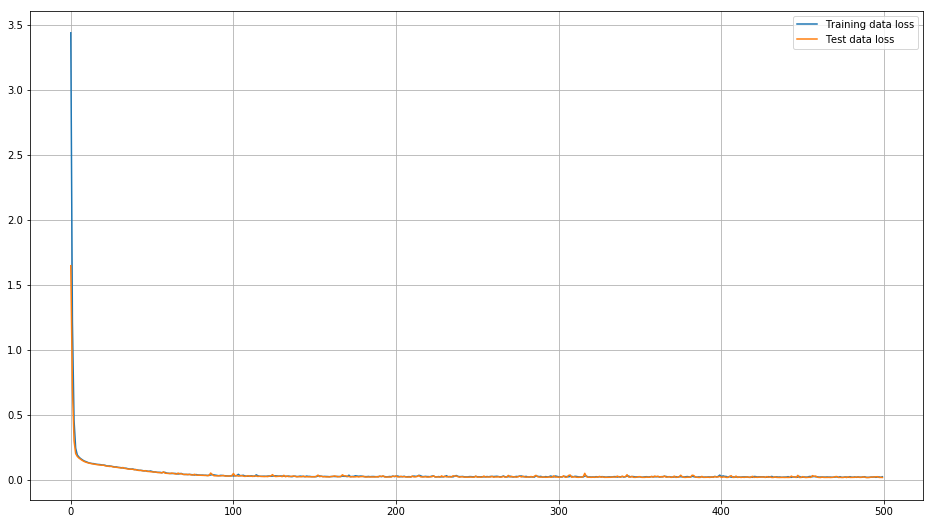

Loss function: mae.


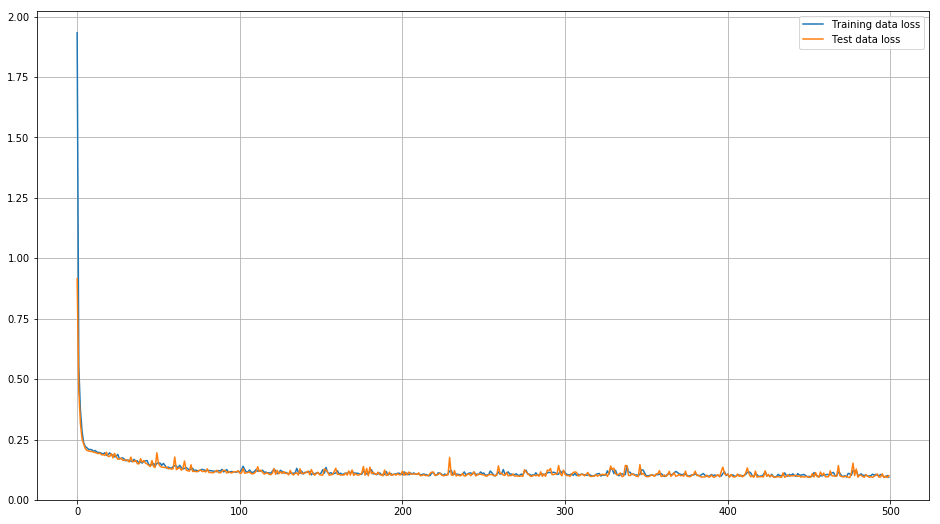

Loss function: mape.


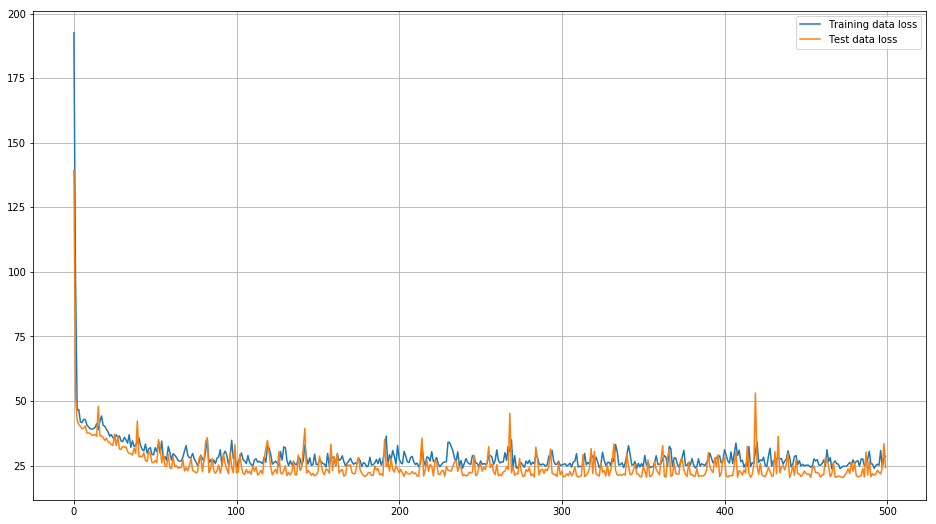

Loss function: msle.


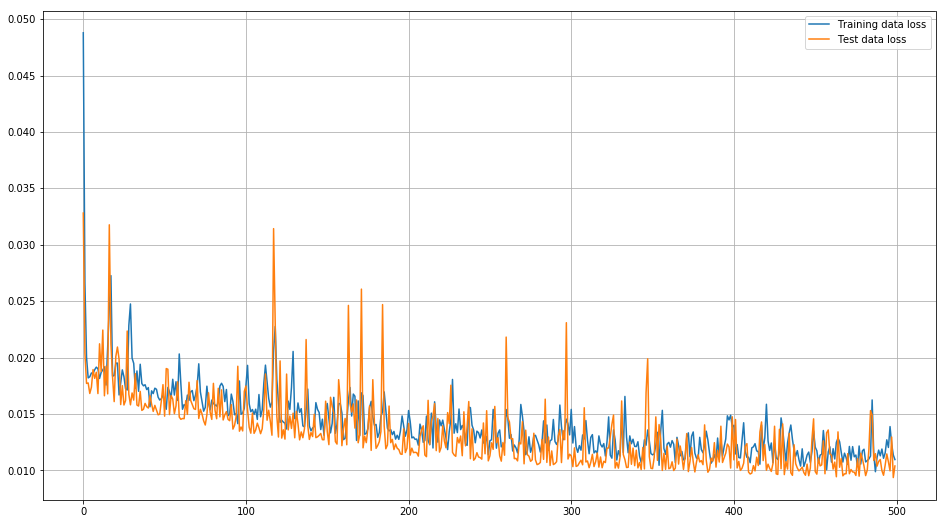

In [14]:
for LF, loss in zip(loss_functions, losses):
    print("Loss function: {0}.".format(LF))
    plt.plot(loss['loss'], label='Training data loss')
    plt.plot(loss['val_loss'], label='Test data loss')
#     plt.axis([0, 500, 0, 0.5])
    plt.grid()
    plt.legend()
    plt.show()

In [15]:
predictions = {}

for file in os.listdir():
    if file.endswith('.h5'):
        model = load_model(file)
        predictions[file] = model.predict(X)
        

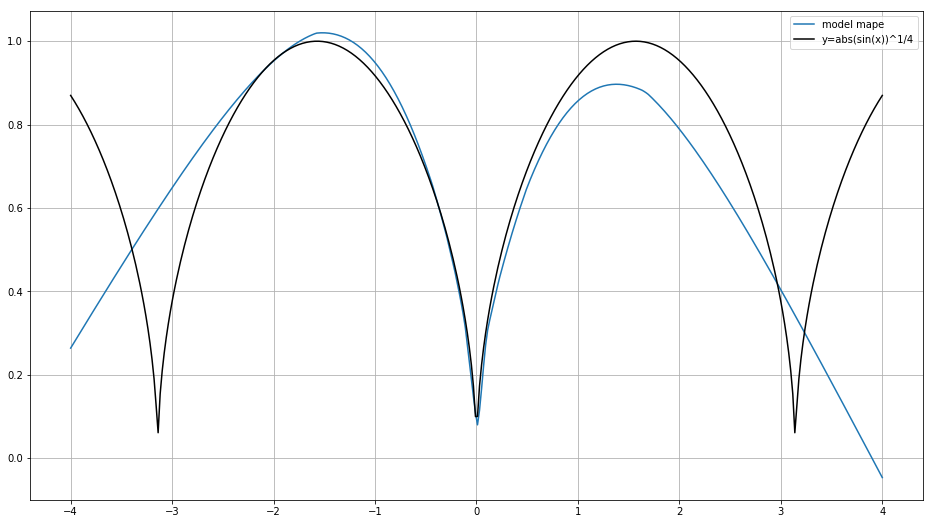

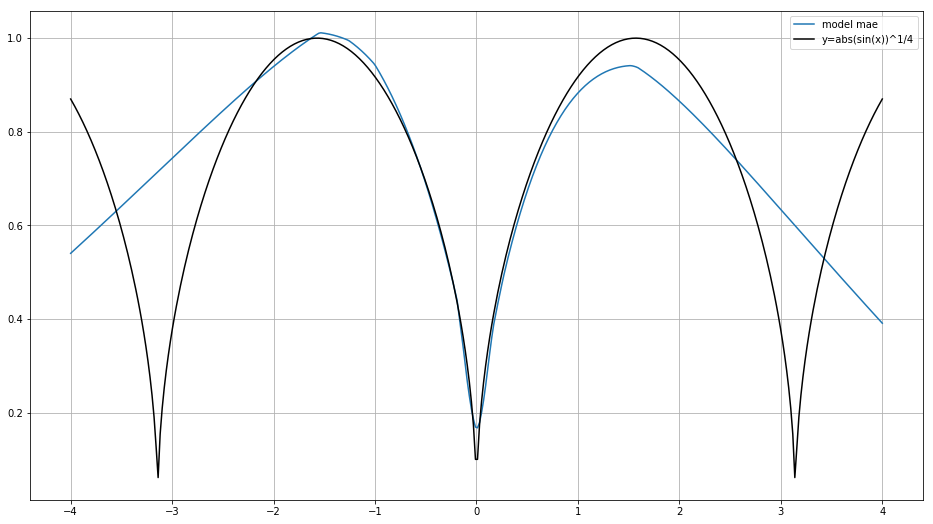

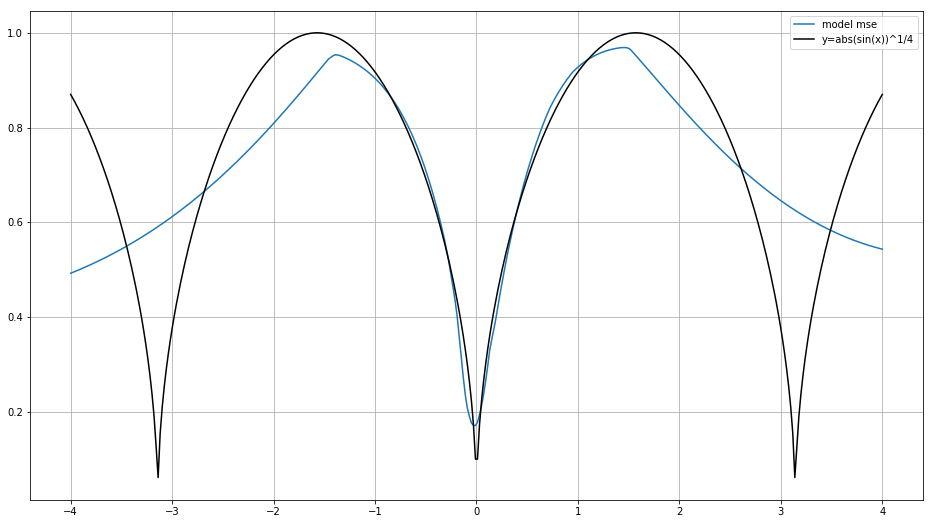

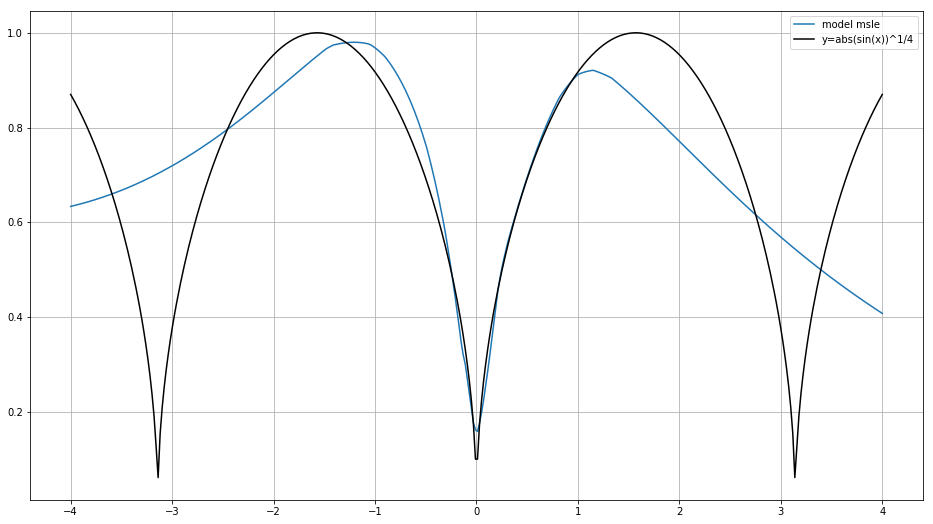

In [16]:
for file in predictions:
    plt.plot(X, predictions[file], label=file[:-3])
    plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
    plt.grid()
    plt.legend()
    plt.show()

# Conclusion:
Ok, so now can see how work loss funtion.